### - 분석 목적

이번에는 출생일과 관련된 자료를 통해 어떤 달에 아이가 많이 태어나고 다른 달과 통계적으로 차이가 있는지 없는지를 알아보고 차이가 있다면 어떠한 요인이 그러한 결과를 만들었는 지 확인해보자.

### - 데이터 출처

데이터는 아래의 UN의 자료를 통해 수집.

In [2]:
## import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
import matplotlib

In [3]:
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'

#폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

#font 설정
matplotlib.rc('font',family=font_name)

2015년부터 2019년까지 5년간의 출생데이터를 받았으며 csv파일에서 불필요한 컬럼과 text를 간단히 제거한 후 분석 진행

In [4]:
## update Data
df = pd.read_csv("C:\\Users\\USER\\Desktop\\Data\\birth_date\\birth_month_korea.csv")

In [5]:
df

,Country or Area,Year,Month,Value
0,Republic of Korea,2019,Total,302676
1,Republic of Korea,2019,January,30271
2,Republic of Korea,2019,February,25710
3,Republic of Korea,2019,March,27049
4,Republic of Korea,2019,April,26104
...,...,...,...,...
60,Republic of Korea,2015,August,35207
61,Republic of Korea,2015,September,36444
62,Republic of Korea,2015,October,36702
63,Republic of Korea,2015,November,33467


분석의 목적은 각 년도별 출생을 파악하는 것이 아닌 각 달별로 차이가 있는지를 파악하는 것이기 때문에 Month 별로 값을 더하자

In [7]:
df2 = df.groupby('Month')['Value'].sum()

In [8]:
df2 = df2.sort_values()

In [9]:
kor_birth = pd.DataFrame(df2)
kor_birth = kor_birth[:-1] # Delete Total

kor_birth.reset_index(inplace=True)

In [10]:
kor_birth['월'] = kor_birth['Month'].map({'January':'1월',
                               'February':'2월',
                               'March':'3월',
                               'April':'4월',
                               'May':'5월',
                               'June':'6월',
                               'July':'7월',
                               'August':'8월',
                               'September':'9월',
                               'October':'10월',
                               'November':'11월',
                               'December':'12월'})
kor_birth = kor_birth.sort_values(by='Value' ,ascending=False)

kor_birth

,Month,Value,월
11,January,178622,1월
10,March,168692,3월
9,April,157394,4월
8,May,154426,5월
7,February,154323,2월
6,July,152205,7월
5,September,151060,9월
4,August,150991,8월
3,October,148238,10월
2,June,147610,6월


<BarContainer object of 12 artists>

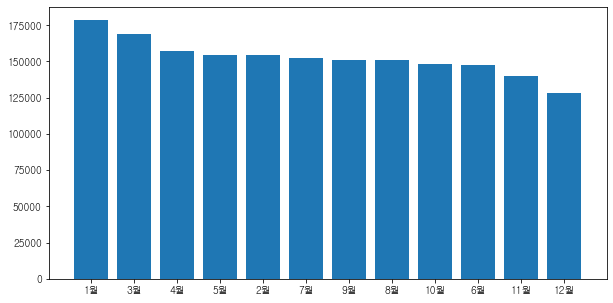

In [11]:
plt.figure(figsize= (10,5))
plt.bar(kor_birth['월'], kor_birth['Value'])

위 데이터를 통해 1월에 생일을 가지는 사람이 제일 많고 12월에 태어난 아이들이 제일 적다는 것을 알 수 있다. 한달의 차이로 5만명의 차이라는 큰 격차가 발생한 이유가 무엇일까?

달 별로 출산율의 차이가 있는 지 확인하기 전에 임신한 달을 파악하여 특징적인 부분이 있는지 확인해보자.

임신기간은 일반적으로 280일로 알려져 있으나 이는 월경 주기에 따른 평균일로써 실제 임신기간은 266일로 보는 것이 맞다.[2] 

따라서 임신기간을 9개월로 계산하여 아래와 같이 진행하자. ex) December -> March

In [12]:
kor_birth['Pregnant_Month'] = kor_birth['월']

# 값을 대체하기 ex) 12월 -> 3월, 1월 -> 4월
kor_birth['Pregnant_Month'] = kor_birth['Pregnant_Month'].map({'1월':'4월',
                                                              '2월':'5월',
                                                              '3월':'6월',
                                                              '4월':'7월',
                                                              '5월':'8월',
                                                              '6월':'9월',
                                                              '7월':'10월',
                                                              '8월':'11월',
                                                              '9월':'12월',
                                                              '10월':'1월',
                                                              '11월':'2월',
                                                              '12월':'3월'})
kor_birth

,Month,Value,월,Pregnant_Month
11,January,178622,1월,4월
10,March,168692,3월,6월
9,April,157394,4월,7월
8,May,154426,5월,8월
7,February,154323,2월,5월
6,July,152205,7월,10월
5,September,151060,9월,12월
4,August,150991,8월,11월
3,October,148238,10월,1월
2,June,147610,6월,9월


### - 결론

가장 임신을 많이한 달은 4월로 나타났으며 제일 임신을 적게한 달은 3월로 나타났다.